In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

# Data Cleaning

In [2]:
df = pd.read_csv('mail_data.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.duplicated().sum()

415

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.drop_duplicates(keep='first')

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
mail_data = df.where(pd.notnull(df),'')

In [8]:
df.shape

(5572, 2)

In [9]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
mail_data.count()

Category    5572
Message     5572
dtype: int64

In [11]:
df.count()

Category    5572
Message     5572
dtype: int64

In [12]:
df.shape

(5572, 2)

# Data Analysis

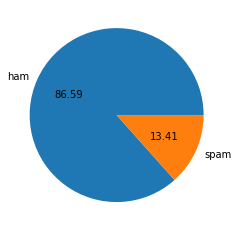

In [13]:
import matplotlib.pyplot as plt
plt.pie(mail_data['Category'].value_counts(),
       labels=['ham','spam'],
       autopct="%0.2f")
plt.show()

In [14]:
import nltk

In [15]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suyas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suyas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
mail_data['no_of_ch'] = mail_data['Message'].apply(len)

In [17]:
mail_data.head()

,Category,Message,no_of_ch
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
mail_data['no_of_ch'].describe()

count    5572.000000
mean       80.368988
std        59.926946
min         2.000000
25%        35.750000
50%        61.000000
75%       122.000000
max       910.000000
Name: no_of_ch, dtype: float64

In [19]:
mail_data[mail_data['Category']=='spam']['no_of_ch'].describe()

count    747.000000
mean     137.989290
std       29.980287
min        7.000000
25%      132.000000
50%      149.000000
75%      157.000000
max      223.000000
Name: no_of_ch, dtype: float64

In [20]:
mail_data[mail_data['Category']=='ham']['no_of_ch'].describe()

count    4825.000000
mean       71.448290
std        58.434864
min         2.000000
25%        33.000000
50%        52.000000
75%        93.000000
max       910.000000
Name: no_of_ch, dtype: float64

In [21]:
import seaborn as sns


<AxesSubplot:xlabel='no_of_ch', ylabel='Count'>

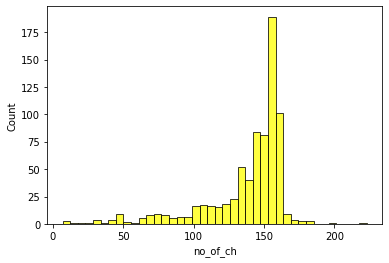

In [22]:
sns.histplot(mail_data[mail_data['Category']=='spam']['no_of_ch'],color='yellow')


<AxesSubplot:xlabel='no_of_ch', ylabel='Count'>

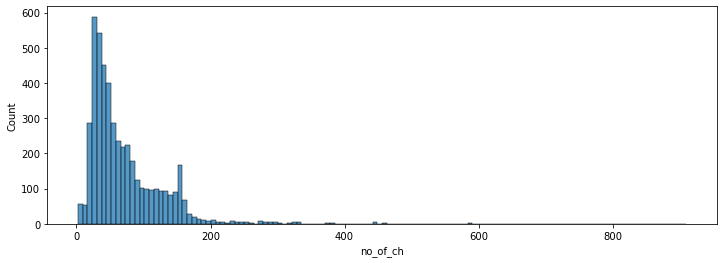

In [23]:
plt.figure(figsize=(12,4))
sns.histplot(mail_data[mail_data['Category']=='ham']['no_of_ch'])

# Data Preprocessing

In [24]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [25]:
transform_text("testing stemming")

'test stem'

In [26]:
mail_data['changed_msg'] = mail_data['Message'].apply(transform_text)

In [27]:
mail_data.head()

,Category,Message,no_of_ch,changed_msg
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


In [28]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white')

In [29]:
spam_wc = wc.generate(mail_data[mail_data['Category'] == 'spam']['changed_msg'].str.cat(sep=" "))

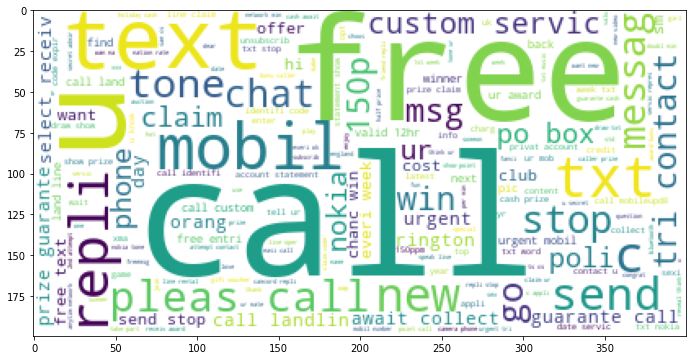

In [30]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [31]:
ham_wc = wc.generate(mail_data[mail_data['Category'] == 'ham']['changed_msg'].str.cat(sep=" "))

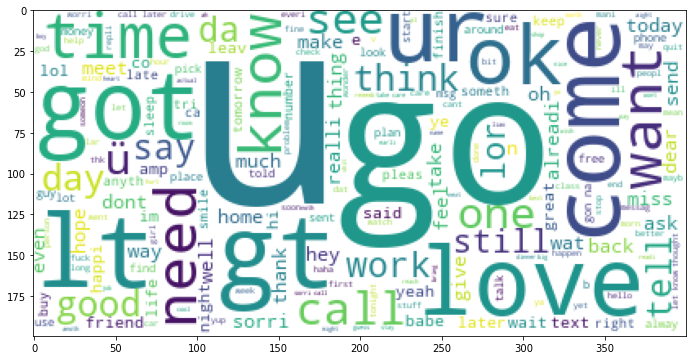

In [32]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [33]:
#labelling spam mail as 0 and ham mail as 1

In [34]:
mail_data.loc[mail_data['Category']=='spam', 'Category', ] = 1

In [35]:
mail_data.head()

,Category,Message,no_of_ch,changed_msg
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


In [36]:
mail_data.shape

(5572, 4)

In [37]:
mail_data.loc[mail_data['Category']=='ham', 'Category', ] = 0

In [38]:
mail_data.head()

,Category,Message,no_of_ch,changed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


In [39]:
#separating the message and its category

X = mail_data['changed_msg']
Y = mail_data['Category']

In [40]:
X

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                              ü b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: changed_msg, Length: 5572, dtype: object

In [41]:
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: object

Splitting the data into training set and testing set

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=4)

In [43]:
x_train.shape

(4457,)

In [44]:
x_test.shape

(1115,)

In [45]:
y_train.shape

(4457,)

In [46]:
y_test.shape

(1115,)

# Feature extraction

In [47]:
feature_extraction = TfidfVectorizer(min_df=1)

In [48]:
print(feature_extraction)

TfidfVectorizer()


In [49]:
x_train_features = feature_extraction.fit_transform(x_train)

In [50]:
x_train_features.shape

(4457, 6045)

In [51]:
x_test_features = feature_extraction.transform(x_test)

In [52]:
x_test_features.shape

(1115, 6045)

In [53]:
y_train = y_train.astype('int')

In [54]:
y_test = y_test.astype('int')

Training the model

In [55]:
model = LogisticRegression()

In [ ]:
# training the model with the x_test abd y_test features

In [57]:
model.fit(x_train_features,y_train)

LogisticRegression()

In [58]:
#prediction on training data  

In [59]:
prediction_on_training_data = model.predict(x_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [60]:
accuracy_on_training_data

0.9670181736594121

In [61]:
#prediction on test data

In [62]:
prediction_on_training_data = model.predict(x_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [63]:
accuracy_on_training_data

0.9670181736594121

Sample Prediction


In [64]:
input_mail = ["free offer"]

In [65]:
#convert data to feature vector

In [66]:
input_feature_vector = feature_extraction.transform(input_mail)

In [67]:
prediction = model.predict(input_feature_vector)

In [68]:
print(prediction)

[1]


sklearn Pipeline

In [69]:
from sklearn.pipeline import Pipeline

In [70]:
x_train

1457    u sleep go take haha got spi wat onlin check n...
472                             long sinc scream princess
2481    urgent call 09066612661 landlin complementari ...
243                    okay shine meant sign sound better
1413    wen ur lovabl bcum angri wid u dnt take seriou...
                              ...                        
3671                                   ok thanx take care
709     review keep fantast nokia game deck club nokia...
2487                              dont thnk wrong call us
174     bloodi hell cant believ forgot surnam mr ill g...
1146    thank winner notifi sm good luck futur market ...
Name: changed_msg, Length: 4457, dtype: object

In [71]:
clf = Pipeline([
                ('vectorizer',CountVectorizer()),
                ('logistic_r',LogisticRegression())
]
)
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('logistic_r', LogisticRegression())])

In [72]:
email=[
       
       "offer",
       "second email"
       

]
clf.predict(email)

array([0, 0])

In [73]:
clf.score(x_test,y_test)

0.97847533632287

In [74]:
import joblib
joblib.dump(clf,'spam_model.pkl')

['spam_model.pkl']